In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5177279


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5177279/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5177279/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [10]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

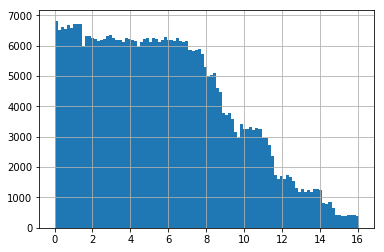

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [14]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [15]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [16]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [17]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [18]:
qdf=qdf[~qdf['index'].isin({0,16})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((410717, 1), (410717, 100), (410717,))

In [19]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 29606, 2: 36381, 3: 22721, 4: 32572, 5: 20661, 6: 18112, 7: 41320, 8: 20285, 9: 24722, 10: 29316, 11: 28282, 12: 22648, 13: 21974, 14: 37848, 15: 24269}'

In [20]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [21]:
import utils
n_thread= utils.get_num_thread()
n_thread

3

In [22]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [23]:
testX=testdf.values
testX.shape

(2624, 100)

In [24]:
trainX=datadf.values
trainX.shape, qdf.shape

((410717, 100), (410717, 1))

In [25]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,2000,trainX)
    topidxs += a

CPU times: user 15min 55s, sys: 4min 16s, total: 20min 12s
Wall time: 6min 44s


In [26]:
len(topidxs),len(set(topidxs))

(5248000, 327156)

In [27]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

1      284367
2       73981
3       72096
4      185190
5      194020
6      282226
7      951602
8      142808
9      178784
10     339773
11     137368
12      71314
13     119233
14    1197405
15    1017833
Name: index, dtype: int64

In [28]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

1     24865
2     19100
3     15074
4     22499
5     18819
6     14044
7     39609
8     16747
9     19647
10    26894
11    21209
12    14525
13    16788
14    34364
15    22972
Name: index, dtype: int64

In [29]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((327156, 1), (327156, 100), (327156,))

In [30]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [31]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [32]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  1 1 (nan, nan)
valid quake 2 train quake 1
(24865, 100) (24865,) (19100, 100) (19100,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07193	valid_1's l1: 3.14663
[100]	training's l1: 0.728076	valid_1's l1: 3.04191
[150]	training's l1: 0.562676	valid_1's l1: 2.98767
[200]	training's l1: 0.472829	valid_1's l1: 2.96167
[250]	training's l1: 0.42385	valid_1's l1: 2.94998
[300]	training's l1: 0.390835	valid_1's l1: 2.94853
[350]	training's l1: 0.366284	valid_1's l1: 2.94796
[400]	training's l1: 0.346485	valid_1's l1: 2.94981
[450]	training's l1: 0.330174	valid_1's l1: 2.95115
[500]	training's l1: 0.316499	valid_1's l1: 2.95263
[550]	training's l1: 0.304528	valid_1's l1: 2.95476
Early stopping, best iteration is:
[360]	training's l1: 0.362381	valid_1's l1: 2.94714
quake  1 2 (2.94714472612888, 360)
valid quake 3 train quake 1
(24865, 100) (24865,) (15074, 100) (15074,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l

[50]	training's l1: 1.07193	valid_1's l1: 2.20079
[100]	training's l1: 0.728076	valid_1's l1: 2.11652
[150]	training's l1: 0.562676	valid_1's l1: 2.10648
[200]	training's l1: 0.472829	valid_1's l1: 2.09633
[250]	training's l1: 0.42385	valid_1's l1: 2.09355
[300]	training's l1: 0.390835	valid_1's l1: 2.08934
[350]	training's l1: 0.366284	valid_1's l1: 2.08645
[400]	training's l1: 0.346485	valid_1's l1: 2.08165
[450]	training's l1: 0.330174	valid_1's l1: 2.07879
[500]	training's l1: 0.316499	valid_1's l1: 2.07478
[550]	training's l1: 0.304528	valid_1's l1: 2.0698
[600]	training's l1: 0.292735	valid_1's l1: 2.06853
[650]	training's l1: 0.28256	valid_1's l1: 2.067
[700]	training's l1: 0.27393	valid_1's l1: 2.06397
[750]	training's l1: 0.26564	valid_1's l1: 2.06292
[800]	training's l1: 0.258285	valid_1's l1: 2.06178
[850]	training's l1: 0.25097	valid_1's l1: 2.05925
[900]	training's l1: 0.244447	valid_1's l1: 2.05782
[950]	training's l1: 0.238559	valid_1's l1: 2.05741
[1000]	training's l1: 

[150]	training's l1: 0.584845	valid_1's l1: 5.89223
[200]	training's l1: 0.494456	valid_1's l1: 5.92371
Early stopping, best iteration is:
[1]	training's l1: 3.49535	valid_1's l1: 5.16098
quake  2 6 (5.1609827785305376, 1)
valid quake 7 train quake 2
(19100, 100) (19100,) (39609, 100) (39609,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.20563	valid_1's l1: 2.48816
[100]	training's l1: 0.770285	valid_1's l1: 2.324
[150]	training's l1: 0.584845	valid_1's l1: 2.28249
[200]	training's l1: 0.494456	valid_1's l1: 2.26072
[250]	training's l1: 0.4422	valid_1's l1: 2.24539
[300]	training's l1: 0.407999	valid_1's l1: 2.23659
[350]	training's l1: 0.382343	valid_1's l1: 2.23268
[400]	training's l1: 0.36195	valid_1's l1: 2.22627
[450]	training's l1: 0.34357	valid_1's l1: 2.22293
[500]	training's l1: 0.327262	valid_1's l1: 2.22412
[550]	training's l1: 0.313093	valid_1's l1: 2.22321
[600]	training's l1: 0.300287	valid_1's l1: 2.22508
[650]	training's l1: 0.289

quake  2 14 (1.9505589371025036, 0)
valid quake 15 train quake 2
(19100, 100) (19100,) (22972, 100) (22972,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.20563	valid_1's l1: 4.60421
[100]	training's l1: 0.770285	valid_1's l1: 4.60787
[150]	training's l1: 0.584845	valid_1's l1: 4.65422
[200]	training's l1: 0.494456	valid_1's l1: 4.69006
Early stopping, best iteration is:
[1]	training's l1: 3.49535	valid_1's l1: 3.50562
quake  2 15 (3.505624884798173, 1)
valid quake 1 train quake 3
(15074, 100) (15074,) (24865, 100) (24865,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.809264	valid_1's l1: 2.47245
[100]	training's l1: 0.506595	valid_1's l1: 2.43753
[150]	training's l1: 0.352051	valid_1's l1: 2.41263
[200]	training's l1: 0.26238	valid_1's l1: 2.40285
[250]	training's l1: 0.21357	valid_1's l1: 2.39935
[300]	training's l1: 0.185482	valid_1's l1: 2.39793
[350]	training's l1: 0.167981	valid_1's l1: 2.39681
[400]	t

[50]	training's l1: 0.809264	valid_1's l1: 1.05099
[100]	training's l1: 0.506595	valid_1's l1: 1.01738
[150]	training's l1: 0.352051	valid_1's l1: 1.01987
[200]	training's l1: 0.26238	valid_1's l1: 1.03357
[250]	training's l1: 0.21357	valid_1's l1: 1.04482
[300]	training's l1: 0.185482	valid_1's l1: 1.05183
Early stopping, best iteration is:
[120]	training's l1: 0.434355	valid_1's l1: 1.01602
quake  3 13 (1.0160173493103353, 120)
valid quake 14 train quake 3
(15074, 100) (15074,) (34364, 100) (34364,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.809264	valid_1's l1: 4.11622
[100]	training's l1: 0.506595	valid_1's l1: 4.22086
[150]	training's l1: 0.352051	valid_1's l1: 4.27083
[200]	training's l1: 0.26238	valid_1's l1: 4.30648
Early stopping, best iteration is:
[14]	training's l1: 1.42731	valid_1's l1: 3.81034
quake  3 14 (3.8103411429096856, 14)
valid quake 15 train quake 3
(15074, 100) (15074,) (22972, 100) (22972,)
Training until validation sco

Early stopping, best iteration is:
[12]	training's l1: 1.96632	valid_1's l1: 2.16562
quake  4 12 (2.1656178532322703, 12)
valid quake 13 train quake 4
(22499, 100) (22499,) (16788, 100) (16788,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.10664	valid_1's l1: 2.49898
[100]	training's l1: 0.749059	valid_1's l1: 2.5055
[150]	training's l1: 0.586463	valid_1's l1: 2.52753
[200]	training's l1: 0.50122	valid_1's l1: 2.53986
Early stopping, best iteration is:
[8]	training's l1: 2.2116	valid_1's l1: 2.10502
quake  4 13 (2.1050164727906275, 8)
valid quake 14 train quake 4
(22499, 100) (22499,) (34364, 100) (34364,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.10664	valid_1's l1: 3.1735
[100]	training's l1: 0.749059	valid_1's l1: 3.18632
[150]	training's l1: 0.586463	valid_1's l1: 3.1952
[200]	training's l1: 0.50122	valid_1's l1: 3.20537
Early stopping, best iteration is:
[25]	training's l1: 1.45086	valid_1's l1: 3.1

Early stopping, best iteration is:
[145]	training's l1: 0.368145	valid_1's l1: 0.978744
quake  5 13 (0.9787435493874749, 145)
valid quake 14 train quake 5
(18819, 100) (18819,) (34364, 100) (34364,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.759755	valid_1's l1: 4.21527
[100]	training's l1: 0.497736	valid_1's l1: 4.30057
[150]	training's l1: 0.357634	valid_1's l1: 4.35092
[200]	training's l1: 0.280189	valid_1's l1: 4.38361
Early stopping, best iteration is:
[12]	training's l1: 1.32411	valid_1's l1: 4.08092
quake  5 14 (4.080915812023678, 12)
valid quake 15 train quake 5
(18819, 100) (18819,) (22972, 100) (22972,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.759755	valid_1's l1: 2.25644
[100]	training's l1: 0.497736	valid_1's l1: 2.42444
[150]	training's l1: 0.357634	valid_1's l1: 2.49203
[200]	training's l1: 0.280189	valid_1's l1: 2.55828
Early stopping, best iteration is:
[18]	training's l1: 1.14352	vali

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.689086	valid_1's l1: 5.44493
[100]	training's l1: 0.453415	valid_1's l1: 5.49158
[150]	training's l1: 0.325009	valid_1's l1: 5.51381
[200]	training's l1: 0.250661	valid_1's l1: 5.53022
Early stopping, best iteration is:
[21]	training's l1: 0.984628	valid_1's l1: 5.39133
quake  6 7 (5.3913291216309425, 21)
valid quake 8 train quake 6
(14044, 100) (14044,) (16747, 100) (16747,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.689086	valid_1's l1: 1.08017
[100]	training's l1: 0.453415	valid_1's l1: 0.950181
[150]	training's l1: 0.325009	valid_1's l1: 0.893244
[200]	training's l1: 0.250661	valid_1's l1: 0.86491
[250]	training's l1: 0.208203	valid_1's l1: 0.855361
[300]	training's l1: 0.182937	valid_1's l1: 0.84889
[350]	training's l1: 0.166451	valid_1's l1: 0.846341
[400]	training's l1: 0.154496	valid_1's l1: 0.847073
[450]	training's l1: 0.145412	valid_1's l1: 0.847989


[750]	training's l1: 0.114962	valid_1's l1: 1.07965
[800]	training's l1: 0.111734	valid_1's l1: 1.07926
[850]	training's l1: 0.108654	valid_1's l1: 1.07909
[900]	training's l1: 0.105879	valid_1's l1: 1.07925
[950]	training's l1: 0.10336	valid_1's l1: 1.0788
[1000]	training's l1: 0.100922	valid_1's l1: 1.07812
[1050]	training's l1: 0.0987937	valid_1's l1: 1.0781
[1100]	training's l1: 0.0966366	valid_1's l1: 1.07775
[1150]	training's l1: 0.0946477	valid_1's l1: 1.0778
[1200]	training's l1: 0.0927628	valid_1's l1: 1.07743
[1250]	training's l1: 0.0909647	valid_1's l1: 1.07749
[1300]	training's l1: 0.0892376	valid_1's l1: 1.07734
[1350]	training's l1: 0.0875291	valid_1's l1: 1.07724
[1400]	training's l1: 0.0859563	valid_1's l1: 1.07673
[1450]	training's l1: 0.0844339	valid_1's l1: 1.07671
[1500]	training's l1: 0.0830148	valid_1's l1: 1.07643
quake  6 13 (1.0764291386062919, 0)
valid quake 14 train quake 6
(14044, 100) (14044,) (34364, 100) (34364,)
Training until validation scores don't imp

[450]	training's l1: 0.665473	valid_1's l1: 3.01454
[500]	training's l1: 0.636053	valid_1's l1: 3.01106
[550]	training's l1: 0.611676	valid_1's l1: 3.00722
[600]	training's l1: 0.590183	valid_1's l1: 3.01003
[650]	training's l1: 0.570486	valid_1's l1: 3.01052
[700]	training's l1: 0.554057	valid_1's l1: 3.00944
[750]	training's l1: 0.537832	valid_1's l1: 3.00958
Early stopping, best iteration is:
[555]	training's l1: 0.609409	valid_1's l1: 3.00683
quake  7 11 (3.0068297393808425, 555)
valid quake 12 train quake 7
(39609, 100) (39609,) (14525, 100) (14525,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.6341	valid_1's l1: 4.20449
[100]	training's l1: 1.21387	valid_1's l1: 4.15216
[150]	training's l1: 1.0192	valid_1's l1: 4.21469
[200]	training's l1: 0.912406	valid_1's l1: 4.21159
[250]	training's l1: 0.841345	valid_1's l1: 4.19218
Early stopping, best iteration is:
[74]	training's l1: 1.38779	valid_1's l1: 4.13042
quake  7 12 (4.13042258110769, 74)
v

[300]	training's l1: 0.195171	valid_1's l1: 1.71098
[350]	training's l1: 0.1796	valid_1's l1: 1.71241
Early stopping, best iteration is:
[155]	training's l1: 0.331814	valid_1's l1: 1.70392
quake  8 9 (1.7039246520419313, 155)
valid quake 10 train quake 8
(16747, 100) (16747,) (26894, 100) (26894,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.743134	valid_1's l1: 2.74637
[100]	training's l1: 0.483483	valid_1's l1: 2.77224
[150]	training's l1: 0.341824	valid_1's l1: 2.79145
[200]	training's l1: 0.262032	valid_1's l1: 2.80766
Early stopping, best iteration is:
[34]	training's l1: 0.887423	valid_1's l1: 2.73067
quake  8 10 (2.7306724567499856, 34)
valid quake 11 train quake 8
(16747, 100) (16747,) (21209, 100) (21209,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.743134	valid_1's l1: 2.36276
[100]	training's l1: 0.483483	valid_1's l1: 2.42366
[150]	training's l1: 0.341824	valid_1's l1: 2.46782
[200]	training's 

[250]	training's l1: 0.282366	valid_1's l1: 1.57466
Early stopping, best iteration is:
[90]	training's l1: 0.595811	valid_1's l1: 1.48232
quake  9 6 (1.4823161144649266, 90)
valid quake 7 train quake 9
(19647, 100) (19647,) (39609, 100) (39609,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.860264	valid_1's l1: 4.28553
[100]	training's l1: 0.552626	valid_1's l1: 4.29699
[150]	training's l1: 0.402797	valid_1's l1: 4.27372
[200]	training's l1: 0.324055	valid_1's l1: 4.26126
[250]	training's l1: 0.282366	valid_1's l1: 4.25739
[300]	training's l1: 0.255912	valid_1's l1: 4.25549
[350]	training's l1: 0.238104	valid_1's l1: 4.25729
[400]	training's l1: 0.223712	valid_1's l1: 4.25737
[450]	training's l1: 0.210978	valid_1's l1: 4.26014
[500]	training's l1: 0.200709	valid_1's l1: 4.26003
Early stopping, best iteration is:
[304]	training's l1: 0.254199	valid_1's l1: 4.25492
quake  9 7 (4.254920913491895, 304)
valid quake 8 train quake 9
(19647, 100) (19647,)

[50]	training's l1: 1.05439	valid_1's l1: 1.77702
[100]	training's l1: 0.703124	valid_1's l1: 1.6424
[150]	training's l1: 0.546932	valid_1's l1: 1.59357
[200]	training's l1: 0.468579	valid_1's l1: 1.57092
[250]	training's l1: 0.424299	valid_1's l1: 1.55908
[300]	training's l1: 0.393988	valid_1's l1: 1.55155
[350]	training's l1: 0.37091	valid_1's l1: 1.54723
[400]	training's l1: 0.352031	valid_1's l1: 1.54626
[450]	training's l1: 0.334978	valid_1's l1: 1.54613
[500]	training's l1: 0.319773	valid_1's l1: 1.54615
[550]	training's l1: 0.306811	valid_1's l1: 1.54734
Early stopping, best iteration is:
[370]	training's l1: 0.362739	valid_1's l1: 1.54565
quake  10 4 (1.5456456152786198, 370)
valid quake 5 train quake 10
(26894, 100) (26894,) (18819, 100) (18819,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.05439	valid_1's l1: 2.8419
[100]	training's l1: 0.703124	valid_1's l1: 2.89635
[150]	training's l1: 0.546932	valid_1's l1: 2.94218
[200]	training's l

[500]	training's l1: 0.224809	valid_1's l1: 2.45364
[550]	training's l1: 0.215308	valid_1's l1: 2.45304
[600]	training's l1: 0.206846	valid_1's l1: 2.45373
[650]	training's l1: 0.199695	valid_1's l1: 2.45448
[700]	training's l1: 0.193529	valid_1's l1: 2.45459
Early stopping, best iteration is:
[545]	training's l1: 0.216184	valid_1's l1: 2.45298
quake  11 2 (2.4529801193166625, 545)
valid quake 3 train quake 11
(21209, 100) (21209,) (15074, 100) (15074,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.89928	valid_1's l1: 1.84202
[100]	training's l1: 0.584945	valid_1's l1: 1.80893
[150]	training's l1: 0.432116	valid_1's l1: 1.81726
[200]	training's l1: 0.353249	valid_1's l1: 1.82807
Early stopping, best iteration is:
[14]	training's l1: 1.56911	valid_1's l1: 1.78242
quake  11 3 (1.782420876619204, 14)
valid quake 4 train quake 11
(21209, 100) (21209,) (22499, 100) (22499,)
Training until validation scores don't improve for 200 rounds.
[50]	training's 

(21209, 100) (21209,) (34364, 100) (34364,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.89928	valid_1's l1: 3.24137
[100]	training's l1: 0.584945	valid_1's l1: 3.28686
[150]	training's l1: 0.432116	valid_1's l1: 3.30718
[200]	training's l1: 0.353249	valid_1's l1: 3.31655
Early stopping, best iteration is:
[20]	training's l1: 1.31132	valid_1's l1: 3.13869
quake  11 14 (3.1386863345732503, 20)
valid quake 15 train quake 11
(21209, 100) (21209,) (22972, 100) (22972,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.89928	valid_1's l1: 1.54098
[100]	training's l1: 0.584945	valid_1's l1: 1.62532
[150]	training's l1: 0.432116	valid_1's l1: 1.67848
[200]	training's l1: 0.353249	valid_1's l1: 1.71455
Early stopping, best iteration is:
[17]	training's l1: 1.42329	valid_1's l1: 1.43565
quake  11 15 (1.4356472266549374, 17)
valid quake 1 train quake 12
(14525, 100) (14525,) (24865, 100) (24865,)
Training until validation

[500]	training's l1: 0.144907	valid_1's l1: 1.12181
[550]	training's l1: 0.13909	valid_1's l1: 1.12233
[600]	training's l1: 0.134075	valid_1's l1: 1.12308
[650]	training's l1: 0.129613	valid_1's l1: 1.12246
Early stopping, best iteration is:
[487]	training's l1: 0.146716	valid_1's l1: 1.12173
quake  12 9 (1.121728896941996, 487)
valid quake 10 train quake 12
(14525, 100) (14525,) (26894, 100) (26894,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.715928	valid_1's l1: 2.25452
[100]	training's l1: 0.461364	valid_1's l1: 2.16757
[150]	training's l1: 0.32623	valid_1's l1: 2.12599
[200]	training's l1: 0.251225	valid_1's l1: 2.10415
[250]	training's l1: 0.209663	valid_1's l1: 2.08847
[300]	training's l1: 0.186089	valid_1's l1: 2.07979
[350]	training's l1: 0.171	valid_1's l1: 2.07644
[400]	training's l1: 0.160134	valid_1's l1: 2.07408
[450]	training's l1: 0.151983	valid_1's l1: 2.07326
[500]	training's l1: 0.144907	valid_1's l1: 2.07256
[550]	training's 

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.817465	valid_1's l1: 1.13735
[100]	training's l1: 0.546193	valid_1's l1: 1.04809
[150]	training's l1: 0.402483	valid_1's l1: 1.02282
[200]	training's l1: 0.321772	valid_1's l1: 1.0197
[250]	training's l1: 0.278372	valid_1's l1: 1.02433
[300]	training's l1: 0.253069	valid_1's l1: 1.02661
[350]	training's l1: 0.233979	valid_1's l1: 1.02918
[400]	training's l1: 0.218682	valid_1's l1: 1.03081
Early stopping, best iteration is:
[213]	training's l1: 0.308305	valid_1's l1: 1.01872
quake  13 5 (1.0187236577793863, 213)
valid quake 6 train quake 13
(16788, 100) (16788,) (14044, 100) (14044,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.817465	valid_1's l1: 1.41565
[100]	training's l1: 0.546193	valid_1's l1: 1.30415
[150]	training's l1: 0.402483	valid_1's l1: 1.25473
[200]	training's l1: 0.321772	valid_1's l1: 1.22621
[250]	training's l1: 0.278372	valid_1's l1: 1.2123
[300

Early stopping, best iteration is:
[13]	training's l1: 2.29123	valid_1's l1: 2.64089
quake  14 1 (2.640888016254546, 13)
valid quake 2 train quake 14
(34364, 100) (34364,) (19100, 100) (19100,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.40055	valid_1's l1: 1.43657
[100]	training's l1: 1.0301	valid_1's l1: 1.53879
[150]	training's l1: 0.846543	valid_1's l1: 1.61333
[200]	training's l1: 0.746133	valid_1's l1: 1.66262
Early stopping, best iteration is:
[49]	training's l1: 1.41181	valid_1's l1: 1.43619
quake  14 2 (1.4361937960660036, 49)
valid quake 3 train quake 14
(34364, 100) (34364,) (15074, 100) (15074,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.40055	valid_1's l1: 3.81473
[100]	training's l1: 1.0301	valid_1's l1: 3.70216
[150]	training's l1: 0.846543	valid_1's l1: 3.68645
[200]	training's l1: 0.746133	valid_1's l1: 3.68654
Early stopping, best iteration is:
[3]	training's l1: 3.17175	valid_1's l1: 3

[50]	training's l1: 1.40055	valid_1's l1: 3.64117
[100]	training's l1: 1.0301	valid_1's l1: 3.88036
[150]	training's l1: 0.846543	valid_1's l1: 3.94485
[200]	training's l1: 0.746133	valid_1's l1: 3.97644
Early stopping, best iteration is:
[1]	training's l1: 3.38032	valid_1's l1: 2.81509
quake  14 15 (2.815094073866071, 1)
valid quake 1 train quake 15
(22972, 100) (22972,) (24865, 100) (24865,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.820107	valid_1's l1: 2.48523
[100]	training's l1: 0.521698	valid_1's l1: 2.5131
[150]	training's l1: 0.367483	valid_1's l1: 2.52793
[200]	training's l1: 0.286964	valid_1's l1: 2.53046
Early stopping, best iteration is:
[19]	training's l1: 1.21175	valid_1's l1: 2.44583
quake  15 1 (2.445828881650076, 19)
valid quake 2 train quake 15
(22972, 100) (22972,) (19100, 100) (19100,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.820107	valid_1's l1: 5.13656
[100]	training's l1: 0.521

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.820107	valid_1's l1: 2.81023
[100]	training's l1: 0.521698	valid_1's l1: 2.90573
[150]	training's l1: 0.367483	valid_1's l1: 2.93686
[200]	training's l1: 0.286964	valid_1's l1: 2.92919
Early stopping, best iteration is:
[13]	training's l1: 1.39349	valid_1's l1: 2.67126
quake  15 10 (2.6712599887401653, 13)
valid quake 11 train quake 15
(22972, 100) (22972,) (21209, 100) (21209,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.820107	valid_1's l1: 2.58355
[100]	training's l1: 0.521698	valid_1's l1: 2.7443
[150]	training's l1: 0.367483	valid_1's l1: 2.80125
[200]	training's l1: 0.286964	valid_1's l1: 2.81184
Early stopping, best iteration is:
[13]	training's l1: 1.39349	valid_1's l1: 2.33799
quake  15 11 (2.3379889609303213, 13)
valid quake 12 train quake 15
(22972, 100) (22972,) (14525, 100) (14525,)
Training until validation scores don't improve for 200 rounds.
[50]

In [33]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [34]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [35]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [36]:
pvdf.style.apply(highlight_max,axis=1)

In [37]:
pvdf.style.apply(highlight_min,axis=1)

In [38]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))